<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>
<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Final Course Project
<a class="tocSkip">    
</h1>  

# Names
+ Enrique Gil García
+ Agustín Rodríguez Agudo
+ Diego Sanz-Gadea Sánchez
+ Ignacio López Soto
+ Ana Bai Maroto Domínguez

# Main Goal of the Project
The main goal of this project is to give you the opportunity to showcase the Exploratory Data Analysis (EDA) and Python skills that you have been practicing in this course. That is, you should select a rich enough data set so that you can use it to (at least) do the following:
- Describe and visualize all common types of variables (qualitative, discrete, continuous).
- In particular make sure that you include a rich set of graphs, covering all the standard types of graphs (bar plots, histograms, density curves, bar plots, scatter plots to name the most relevant). Bot remember: do not include a graph without including a comment about the information it provides!
- Make some inference about the variables in the data set: get some confidence intervals, test hypothesis, etc.
- Analyze the possible relations between variables in you data. The kind of analysis we look for is exploratory or based in elementary linear or logistic models. There is no need for more complicated modeling, you will have plenty of that in Machine Learning.
- Some amount of Data Wrangling (dealing with missing data, outliers, untidy data sets, etc.) is highly encouraged and will be taken into account for grading, but keep in mind that it is easy to get lost in this! Keep it under control and talk to us when in doubt.

# Description of the Project
In this project, we aim to permorm an analysis on the 50 best-selling novels on Amazon between the years 2009 and 2021 according to different criteria based on variables contained in the dataset. We have used a dataset which was found in the folloring webpage https://www.kaggle.com/datasets/zwl1234/top-50-bestselling-novels-20092021-of-amazon. 

**Attribute Information**
+ **Name:** How the book is titled.
+ **Author:** The person or organization who wrote the book.
+ **User rating:** From 1-5, of how the book is scored.
+ **Reviews:** The amount of people who give a score on the book.
+ **Price:** How much the book is sold.
+ **Price_r:** How much the book is sold, rounded up.
+ **Year:** When is the book placed on the best selling list.
+ **Genre:** Fiction or Non Fiction.

# Libraries

In [4]:
# Standard Data Science Libraries Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats

import statsmodels.api as sm 
import statsmodels.formula.api as smf

#sns.set(rc={'figure.figsize':(12, 8.5)})
sns.set()

# Exploratory Data Analysis

## Basic Information

In [5]:
books = pd.read_csv('./data/Amazon Top 50 Books 2009-2021 - Reworked Sheet (1).csv', sep=",", header=0)

In [6]:
books.head()

Name              Author  User Rating  \
0            10-Day Green Smoothie Cleanse            JJ Smith          4.7   
1                        11/22/63: A Novel        Stephen King          4.6   
2  12 Rules for Life: An Antidote to Chaos  Jordan B. Peterson          4.7   
3                                     1984       George Orwell          4.7   
4                   1984 (Signet Classics)       George Orwell          4.7   

  Reviews   Price Price_r  Year        Genre  
0  17,350   $8.00      $8  2016  Non Fiction  
1   2,052  $22.00     $22  2011      Fiction  
2  18,979  $15.00     $15  2018  Non Fiction  
3  70,425   $7.48      $8  2021      Fiction  
4  21,424   $6.00      $6  2017      Fiction

The dataset contains 8 variables, of which 3 are **qualitative** (*Name*, *Author*, *Genre*) and 5 are **quantitative** (*User Rating*, *Reviews*, *Price*, *Price_r*, *Year*). 

Among the quantitative variables, *Rating* and *Price* are **continuous** and *Year*, *Reviews* and *Price_r* are **discrete**. As can be seen, *Price_r* is a variable obtained by rounding the value of the price variable so it is probably closely related to this variable.

In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         650 non-null    object 
 1   Author       650 non-null    object 
 2   User Rating  650 non-null    float64
 3   Reviews      650 non-null    object 
 4   Price        650 non-null    object 
 5   Price_r      650 non-null    object 
 6   Year         650 non-null    int64  
 7   Genre        650 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 40.8+ KB


In [8]:
# Shape of the dataset
print('The shape of the dataset is' , books.shape, '\n')

# Number of observations
print('The number of observations is' , books.shape[0], '\n')

# Number of variables
print('The number of variables is' ,books.shape[1], '\n')

# Variables
print('The variables are: \n', books.columns, '\n')

The shape of the dataset is (650, 8) 

The number of observations is 650 

The number of variables is 8 

The variables are: 
 Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Price_r', 'Year',
       'Genre'],
      dtype='object') 



Through the **info** method, we obtain general information about the dataset
+ We observe that there are **650 rows** and **8 columns**
+ The variables *Reviews, Price* and *Price_r* are of type object, so to analyze the dataset we will have to convert them to **numeric** format as there are quantitative variables.
+ The variables *Name*, *Author* and *Genre* are of type object, so we will have to convert them into **category** type as there are cualitative variables.

## Missing Values

In [9]:
# Check missing data
print("Are there missing values (NaN)?:\n", books.isnull().values.any(), '\n')
print("The variables which have missing values (NaN) are:\n", books.isnull().sum())

Are there missing values (NaN)?:
 False 

The variables which have missing values (NaN) are:
 Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Price_r        0
Year           0
Genre          0
dtype: int64


There are not missing values so we can use all the registers of the original dataset.

## Data Types of Variables

Now, we are going to convert variables *Name*, *Author* and *Genre* to **category**.

Also, we are going to convert continuos quantitative variables into **float64** and discrete quantitative variables into **int64** type.

In [10]:
# Cualitative variables
books.Name = books.Name.astype('category')
books.Author = books.Author.astype('category')
books.Genre = books.Genre.astype('category')

# Quantitative variables
books.Price = books.Price.str.replace("$","").astype('float64')
books.Price_r = books.Price_r.str.replace("$","").astype('int64')

books.Reviews = books.Reviews.str.replace("$","")
books.Reviews = books.Reviews.str.replace(",","")
books.Reviews = books.Reviews.astype('int64')

books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         650 non-null    category
 1   Author       650 non-null    category
 2   User Rating  650 non-null    float64 
 3   Reviews      650 non-null    int64   
 4   Price        650 non-null    float64 
 5   Price_r      650 non-null    int64   
 6   Year         650 non-null    int64   
 7   Genre        650 non-null    category
dtypes: category(3), float64(2), int64(3)
memory usage: 58.6 KB


/var/folders/h_/x3f6s7792kd6rzh03gx1ppqw0000gn/T/ipykernel_13386/2707463001.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  books.Price = books.Price.str.replace("$","").astype('float64')
/var/folders/h_/x3f6s7792kd6rzh03gx1ppqw0000gn/T/ipykernel_13386/2707463001.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  books.Price_r = books.Price_r.str.replace("$","").astype('int64')
/var/folders/h_/x3f6s7792kd6rzh03gx1ppqw0000gn/T/ipykernel_13386/2707463001.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  books.Revie

## Basic Numeric Summary

### Quantitative Variables

The **describe** method gives us values of count, mean , std, min, max and percentiles from all the quantitative variables of the dataset.

In [11]:
books.describe()

User Rating        Reviews       Price     Price_r         Year
count   650.000000     650.000000  650.000000  650.000000   650.000000
mean      4.635385   17204.853846   12.764169   12.796923  2015.000000
std       0.221517   20715.650579   10.176392   10.168624     3.744539
min       3.300000      37.000000    0.000000    0.000000  2009.000000
25%       4.500000    4789.250000    7.000000    7.000000  2012.000000
50%       4.700000    9957.000000   11.000000   11.000000  2015.000000
75%       4.800000   22359.250000   15.000000   15.000000  2018.000000
max       4.900000  193482.000000  105.000000  105.000000  2021.000000

Regarding the results of this fuction:
+ The mean of **User Rating** is very close to its median (50%), so there probably won't be many outliers. 
+ The mean of **Reviews** is far away from the median (50%), so there will be many outliers.
+ The mean and median of **Price** and **Price_r** are almost the same, which is totally logical since these variables have been obtained one through the other.
+ In **Year**, the mean matches with the median, so the distribution of this variable is likely to be very homogeneous.

### Cualitative variables

In order to study the factors of our dataset, we have used frequency tables: relative and absolute frequencies.

Taking into account the information that describes each of the cualitative values, it only makes sense to study the frequency table of Genre and maybe of Author, as there could be more than one books writen by the same person.

In [12]:
# Frequency tables: Genre
AbsFreq_Genre = books['Genre'].value_counts()
print('The absolute frequency table of Genre is:')
AbsFreq_Genre

The absolute frequency table of Genre is:


Non Fiction    363
Fiction        287
Name: Genre, dtype: int64

In [13]:
# Frequency tables: Genre
RelFreq_Genre = books['Genre'].value_counts(normalize=True).sort_index()
print('The relative frequency table of Genre is:')
RelFreq_Genre

The relative frequency table of Genre is:


Fiction        0.441538
Non Fiction    0.558462
Name: Genre, dtype: float64

In [14]:
# Frequency tables: Author
AbsFreq_Author = books['Author'].value_counts()
print('The absolute frequency table of Author is:')
AbsFreq_Author

The absolute frequency table of Author is:


Jeff Kinney                           14
Gary Chapman                          13
Suzanne Collins                       12
Rick Riordan                          11
American Psychological Association    11
                                      ..
Mark Twain                             1
Christopher Paolini                    1
Marty Noble                            1
Mary Ann Shaffer                       1
Michael Wolff                          1
Name: Author, Length: 292, dtype: int64

In [15]:
# Frequency tables: Author
RelFreq_Author = books['Author'].value_counts(normalize=True).sort_index()
print('The relative frequency table of Author is:')
RelFreq_Author

The relative frequency table of Author is:


Abraham Verghese      0.003077
Adam Gasiewski        0.001538
Adam Mansbach         0.001538
Adam Silvera          0.001538
Adam Wallace          0.004615
                        ...   
William P. Young      0.003077
Wizards RPG Team      0.004615
Wonder House Books    0.001538
Workman Publishing    0.004615
Zhi Gang Sha          0.003077
Name: Author, Length: 292, dtype: float64

# Price Analysis

<AxesSubplot:xlabel='Price', ylabel='Count'>

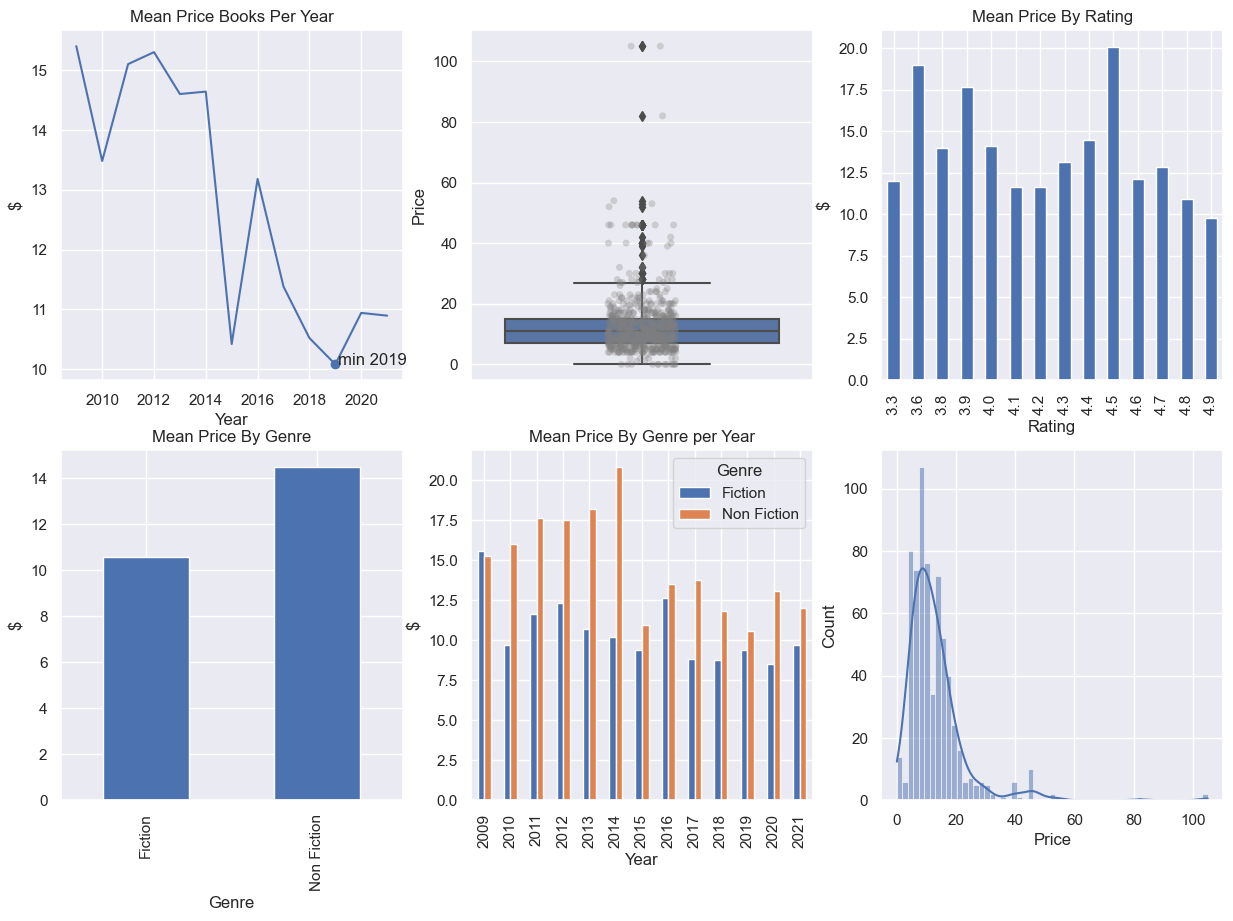

In [16]:
# Generate the dataframes that i want to plot
mean_books_price_by_year=books.groupby("Year").mean()["Price"]
mean_books_price_by_genre=books.groupby("Genre").mean()["Price"]
mean_books_price_by_genre_per_year=books.groupby(["Year","Genre"]).mean()["Price"]
mean_books_price_by_userrating=books.groupby("User Rating").mean()["Price"]
user_rating_percent=books["User Rating"].value_counts(normalize=True).sort_index()


fig, axs = plt.subplots(2,3,figsize=(15,10)) # This is used to generate the grouped plots

# Graphic (0,0)
mean_books_price_by_year.plot.line(title="Mean Price Books Per Year", ylabel="$", xlabel="Year",grid=True,ax=axs[0,0])
axs[0,0].scatter(x=mean_books_price_by_year.idxmin(),y=mean_books_price_by_year.min()) #Indico un punto en la grafica
axs[0,0].text(x=mean_books_price_by_year.idxmin()+0.1,y=mean_books_price_by_year.min(), s=f'min {mean_books_price_by_year.idxmin()}') #Escribo un texto en la gráfica
# Graphic (0,1)
#user_rating_percent.plot.bar(title="User Rating", ylabel="%", xlabel="Rating",ax=axs[0,1],grid=True)
sns.boxplot(y=books.Price, ax=axs[0,1])
sns.stripplot(y=books.Price, ax=axs[0,1], alpha=0.3,color='grey')
# Graphic (0,2)
mean_books_price_by_userrating.plot.bar(title="Mean Price By Rating", ylabel="$", xlabel="Rating",ax=axs[0,2],grid=True)
#Gráfica (1,0)
mean_books_price_by_genre.plot.bar(title="Mean Price By Genre", ylabel="$", xlabel="Genre",ax=axs[1,0],grid=True)
# Graphic (1,1)
mean_books_price_by_genre_per_year.unstack().plot.bar(title="Mean Price By Genre per Year", ylabel="$", xlabel="Year",ax=axs[1,1],grid=True)
sns.histplot(books.Price, ax=axs[1,2], kde=True)

+ From the first graph we can tell that older books tend to be more expensive than more recent ones. The year 2019 stands out for having the lowest average price for books, which is close to $10.

+ The second graph shows the distribution of the price of books. The boxplot indicates that most prices sit lower than $30. The most expensive book costs more than 100 dollars.

+ From the third plot we can see the average price for books grouped by rating. It is interesting to see that the highest rated books (4.9) are the cheapest. It is also surprising that books with 3.6 rating are that expensive, around $18. The reason behind that could be that people that review the books take price highly into consideration. 

+ The bottom left graph plots the average price for fiction and non-fiction books. Non-fiction books seem to be more expensive.

+ In the fifth graph (middle bottom) we can se that non fiction books are consistently more expensive than fiction books year after year. The only exception is 2009, where both genres have a similar price.

+ In the last graph (bottom right) we can see that most books are priced around $10. the dirtribution of the prices is centered at this value is right skewed because of outlier prices.

# Reviews Analysis

In [ ]:
sum_reviews_by_genre=books.groupby("Genre").sum()["Reviews"]
mean_reviews_by_genre=books.groupby("Genre").mean()["Reviews"]

mean_reviews_per_year=books.groupby(["Year"]).mean()["Reviews"]

sum_reviews_and_genre_per_year=books.groupby(["Year","Genre"]).sum()["Reviews"]
mean_reviews_and_genre_per_year=books.groupby(["Year","Genre"]).mean()["Reviews"]

sum_reviews_by_user_rating=books.groupby(["User Rating","Genre"]).sum()["Reviews"]
mean_reviews_by_user_rating=books.groupby(["User Rating","Genre"]).mean()["Reviews"]

In [ ]:
fig, axs = plt.subplots(2,3,figsize=(15,10)) # This is used to generate the grouped plots

# Graphic (0,0)
mean_reviews_by_genre.plot.bar(title="Mean Reviews by Genre 2009-2021", ylabel="Reviews", xlabel="Genre",grid=True,ax=axs[0,0])

# Graphic (0,1)
#user_rating_percent.plot.bar(title="User Rating", ylabel="%", xlabel="Rating",ax=axs[0,1],grid=True)
sns.boxplot(y=books.Reviews, ax=axs[0,1])
sns.stripplot(y=books.Reviews, ax=axs[0,1], alpha=0.3,color='grey')
# Graphic (0,2)
mean_reviews_by_user_rating.unstack().plot.bar(title="Mean Reviews By User Rating", ylabel="Reviews", xlabel="User Rating",ax=axs[0,2],grid=True)
# Graphic (1,0)
mean_reviews_and_genre_per_year.unstack().plot.bar(title="Mean Reviews per Year", ylabel="Reviews", xlabel="Year",ax=axs[1,0],grid=True)
# Graphic (1,1)
mean_reviews_per_year.plot.line(title="Mean Reviews By Year", ylabel="Reviews", xlabel="Year",ax=axs[1,1],grid=True)
sns.histplot(books.Reviews, ax=axs[1,2], kde=True)
fig.tight_layout()

Regarding the **Reviews** variable, we can extract from the graphs:
+ The average rating is higher for fiction
+ The typical number of reviews is under 25,000
+ The highest rated books have more reviews if they are Non fiction than otherwise.
+ The number of reviews has grown substantially over the years.
+ Over the years the number of reviews has increased, especially after 2019 where the growth is outstanding.
+ The number of ratings is right-skewed.

# Name Analysis

## Top 3 books by User Rating and Reviews
- In order of priority, firstly rating and then ordered by number of reviews:

In [ ]:
books.sort_values(["User Rating","Reviews",],ascending=False).head(3)

+ By year:

In [ ]:
books.sort_values(["User Rating","Reviews"],ascending=False).drop_duplicates(subset="Year").sort_values(["Year"])

## Top 3 more expensive books

Taking into account that one book may appears in several years and its price could change from one year to another, we decided not to drop duplicates in the subset of Name.

In [ ]:
books.sort_values(["Price"],ascending=False).head(3)

As we can see, the most expensive book is *Diagnostic and Statistical Manual of Mental Disorders* which has appeared on the best selling list in 2013 and 2014 with the same price (105$).

## Top 3 more cheap books

We have taken into account the same considerations as for the Top 3 more expensive books.

In [ ]:
books.sort_values(["Price"],ascending=False).tail(3)

The cheapest book is *To Kill a Mockingbird* which was free in 2015 and 2016. Thus, we can see that it is not usual to change the price of books over the years.

# Author Analysis

## Most frequent authors (2009-2021)

In [ ]:
books.Author.value_counts()

The author who has written the most books appearing on the best seller list is Jeff Kinney.

## Authors with the most books written (2009-2021)

In [ ]:
books.drop_duplicates(subset="Name").Author.value_counts()

The author that has appeared the most on the best selling list between 2009 and 2021 is also Jeff Kinney.

# **3 Author assessment criteria**
We have used 3 different criteria to analyze the authors:
- Overall Rating
- Overall Rating2
- Overall Rating3


### 3 Best Authors (2009-2021)  given by Overall Rating 1

In order to analyze the best authors we have used the following formula:



$$
\quad\\
\hspace{0.5cm}\textbf{Overall Rating 1}
\quad\\
\hspace{1cm} 

\text{Average Book Rating} * \text{Percentage of Average Reviews} * \text{Percentage of Appearances}

$$





The percentage of appearances could be replaced by the number of books written by author (these are different terms). But the number of appearances is chosen, since it is possible for a book to be in the Top 50 for several years

In [ ]:
replacers={"Fiction":1,"Non Fiction":0} #Se sustituye los generos por valores binarios
books["Genre2"]=books.Genre.replace(replacers).astype(int) #genero una columna genre2 que posteriormente sera tratada
df2=books.groupby("Author").mean().sort_values(["User Rating", "Reviews"],ascending=False)
df2["Count"]=books.Author.value_counts() #Cuenta de las aparaciones de autores entre 2009-2021
df2["Normalize Count"]= books.Author.value_counts(normalize=True) #Normalización de las apariciones
df2["Normalize Reviews"]=df2.Reviews.apply(lambda x: x/df2.Reviews.sum()) #Normalización de las reviews
df2["Overall Rating"]= df2["Count"]*df2["Normalize Reviews"]*df2["User Rating"]*10 #Multiplico por 10 para obtener una cifra mas entendible
#Ordeno las columnas del DataFrame
df2=df2.reindex(columns=["Overall Rating", "User Rating", "Reviews","Normalize Reviews","Count", "Normalize Count","Price","Genre2"])
#Ordeno todo el DataFrame según el Overall Rating calculado
df2.sort_values(["Overall Rating"],ascending=False)
df2["Genre2"]=df2.Genre2.apply(lambda x: 1 if  x>=0.5 else 0) #df2 es un groupby por media por lo que para Genre2 si sus valores son x>0.5 ...
#...el género principal del autor será Ficcion
df2.head()

In the table above we can see the top 5 Authors based on the rating we gave them, among other variables.

### Best Authors with economic factor (2009-2021) 
This rating is given by:

$$
\quad\\
\hspace{0.5cm}\textbf{Overall Rating 2}
\quad\\
\hspace{1cm} 

\text{Average Rating of the books} * \text{Percentage of Average Reviews} * \text{Percentage of Appearances} * \text{Percentage of economic degree of the Average Price}

$$


- The percentage of appearances could be replaced by the number of books written by author (they are different terms).

- All the variables or all except one are normalized, in order to obtain the score. When normalizing what is achieved is that all the variables have their value between 0-1. So they can be multiplied to obtain a score as they are on the same scale.

In [ ]:
bins=[i for i in range(int(df2.Price.min()),int(df2.Price.max())+2,3)] # genero unas bin que van desde el precio mínimo al máximo registrado de 3 en 3
labels=range(1,len(bins))
df2["Economic Price Points"]=pd.cut(df2.Price, bins=bins, labels=range(len(bins)-1,0,-1)).astype(float) # Se convierte la categoria producida por el cut a traves de un label
# Los labels de asignan de forma inversa es decir los autores con medias mas caras tendran un label/categoria mas baja.
#La puntuación de los labels va de 1-35 de mas caro a mas barato

In [ ]:
df2.fillna(len(bins)-1,inplace=True) # Los libros de precio 0 al categorizar obtienen valor Nan, por lo ..
#... le asigno el valor manualmente. El valor es 35, pues pertenece a la categoría mas barata

In [ ]:
df2["NUser Rating"]=df2["User Rating"].apply(lambda x: x/df2["User Rating"].sum()) # Normalizo User Rating
df2["NEco Points"]=df2["Economic Price Points"].apply(lambda x: x/df2["Economic Price Points"].sum()) #Normalizo los puntos por grado de precio

In [ ]:
df2["Overall Rating2"]=df2["Normalize Count"]*df2["Normalize Reviews"]*df2["User Rating"]*df2["NEco Points"]*10000000
df2.sort_values(["Overall Rating2"], ascending=False)

The top 5 authors based on an economic factor appear in the table above along with their rating and other variables.

### Best Authors according to the sum of the assigned score and given the sum of the positions of each year by the established ranking of average User rating and average Reviews (Overall Rating 3)

In [ ]:
df3=books.sort_values(["Year","User Rating","Reviews"])
df3["Puesto por Año"]=np.tile(np.arange(1,51),(2021-2009)+1) # A cada libro se le asigna una puntuación (1-50) dado por el orden de..
# mejor libro al año
df3.groupby("Author").sum()["Puesto por Año"].sort_values(ascending=False) #Puntuación por autor entre (2009-2021)

In [ ]:
df2=df2.reindex(df3.groupby("Author").sum()["Puesto por Año"].sort_values(ascending=False).index)
df2["Overall Rating3"]=df3.groupby("Author").sum()["Puesto por Año"].sort_values(ascending=False)
df2.reindex(columns=["Overall Rating3","Overall Rating2","Overall Rating","User Rating","Reviews","Price","Count" ]) #Para ordenar la aparición de columnas en le DataFrame


I normalize the calculated author scores to be between 3 and 5. Between 3 and 5 since the User Rating is bounded between 3.3 and 4.9

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(3,5))
selected_columns=["Overall Rating3", "Overall Rating2", "Overall Rating"]
df2[selected_columns]=scaler.fit_transform(df2[selected_columns])
df2.reindex(columns=["Overall Rating3","Overall Rating2","Overall Rating","User Rating","Reviews","Price","Count", "Genre2" ])

# Correlation 

With the Data from the original dataFrame, there is not much correlation, so it is difficult to implement a linear regression algorithm. But with the new Overall Rating variables things may be different.

In [ ]:
books.corr()

Scatter matrix del DataFrame original

In [ ]:
from pandas.plotting import scatter_matrix
#son muchas graficas porque son 13x13 figuras

scatter_matrix(books,figsize=(12,8)); #El punto y coma sirve para que no salga la infromaxión textual de matplotlib-pandas

In this pairplot not much information can be extracted. However, it is clear that the variables **Price** and **Price_r** have a similar behavior since they represent practically the same thing.

### DataFrame with new Overall rating variables

In [ ]:
selected_columns=["Overall Rating","Overall Rating2", "Overall Rating3", "User Rating", "Reviews","Count","Price","Genre2"]
df2[selected_columns].corr()

In [ ]:
scatter_matrix(df2[selected_columns],figsize=(15,15));

In this pairplot you can see two relevant things:
+ Both **Overall Rating** and **Overall Rating 2** make an almost linear trend for Reviews
+ **Overall Rating** vs **Overall Rating 2** have a linear behavior

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df2[selected_columns].corr(),annot=True)

From this correlation matrix, it can be seen that **Count** and **Overall Rating3** are highly correlated.

# Possible models
From this dataset, we can build different prediction models. We have made these two:
- Linear regression to predict the Overall Rating of an Author
- Logistic regression to predict whether a book is fiction or non-fiction based on its characteristics

## Linear Regression
Model to predict the Overall Rating of an Author

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
selected_columns=[ "Reviews","Count","Price","Genre2"]
X_train,X_test,y_train,y_test=train_test_split(df2[selected_columns],df2["Overall Rating2"],test_size=0.2,random_state=42)

In [ ]:
X_train_1=X_train.copy()
X_train_1["Overall Rating"]=y_train
print(X_train_1.corr()["Overall Rating"].sort_values(ascending=False))
sns.pairplot(pd.DataFrame(X_train_1))

Pairplot of the training set we have taken.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lrg=LinearRegression()
lrg.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
lrg_pred=lrg.predict(X_test)
error=np.sqrt(mean_squared_error(y_test,lrg_pred))
print("Mean square error of prediction" ,error)

The MSE is quite good since it is a value very close to 0 which would be the best.

In [ ]:
df_pred=pd.DataFrame(lrg_pred,columns=['prediction'],index=y_test.index)
df_pred['real']=y_test
df_pred['delta']=df_pred['real']-df_pred['prediction']
df_pred["% Relative Error"]=df_pred["delta"]*100/df_pred["real"]
print("The average relative error in the preditions", df_pred["% Relative Error"].mean())
df_pred.head(5)

We analyze if there are negative values in the prediction. Everyone should be positive.

In [ ]:
(df_pred['prediction']<0).value_counts()

In [ ]:
df_pred.loc[(df_pred['prediction']<3) | (df_pred['prediction'] >5)].value_counts().sum()

In [ ]:
df_pred.loc[(df_pred['prediction']<3) | (df_pred['prediction'] >5)]

There are eight predictions under 3, so we can improve the model by postprocessing the predictions and adjusting them to the scale.

In [ ]:
df_pred.loc[(df_pred['prediction']<3)] = 3

In [ ]:
error=np.sqrt(mean_squared_error(y_test,df_pred['prediction']))
print("Error medio cuadrático de la predicción en test:" ,error)

The MSE was only reduced by 0.001, but our model is now a bit more precise

## LINNEAR REGRESSION STATS

+ First, we train the model using the **StatsModels** library

In [ ]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

model_SM = sm.OLS(y_train, X_train) # OLS comes from Ordinary Least Squares (minimos cuadrados)

In [ ]:
SM_fit = model_SM.fit()

+ We present a summary where we will analyze the most relevant values separately

In [ ]:
SM_fit.summary()

In [ ]:
SM_fit.bse 

+ Here we can see the standard errors of the coefficients calculated for each variable. As they are all very small, we have obtained a good model.

In [ ]:
SM_fit.params

+ These are the model coefficients for each trained variable

In [ ]:
SM_fit.conf_int(alpha=0.05)

+ This table presents the confidence intervals (95%) for each coefficient

In [ ]:
SM_fit.rsquared

+ Finally, we obtain the $R^2$, being close to 1, another measure is obtained to know that our model is good.

### DIAGNOSTIC OF RESIDUALS

In [ ]:
#%run ./Linear_Reg_Diagnostic.py
SM_fit_diagnose = Linear_Reg_Diagnostic(SM_fit)
SM_fit_diagnose
#plotea el grafico residuals vs fitted
SM_fit_diagnose.residual_plot()
plt.show()
#plotea el qq-plot de los residuos
SM_fit_diagnose.qq_plot()
plt.show()
#Este grafico estandariza los residuos y los plotea frente fitted
SM_fit_diagnose.scale_location_plot()
plt.show()
#si un punto tiene un gran leverega es que tiene gran influencia en el modelo
SM_fit_diagnose.leverage_plot()
plt.show()

+ As you can see in the first graph, the residuals are very high, possibly produced by outliers.
+ In the second graph you can see that they do not follow a normal distribution
+ In the last graph you can see that it is below the Cook curve which is what you would expect

## LOGISTIC REGRESSION

+ Predicting whether a book is fiction or non fiction.

First of all we are going to see which of the Overall Rating variables has the most relationship with the genre.

In [ ]:
for i in ['Overall Rating','Overall Rating2','Overall Rating3']:
    sns.boxplot(data = df2,x='Genre2',y=i)
    plt.show()

 Overall Rating and Overall Rating2 explain the Genre better than Overall Rating3. Since they have such similar boxplots, we will randomly choose Overall rating2 to make the predictions.

In [ ]:
selected_columns_2=[ "Reviews","Count",'Price',"Overall Rating2"]
X_train_LR,X_test_LR,y_train_LR,y_test_LR=train_test_split(df2[selected_columns],df2["Genre2"],test_size=0.2,random_state=42)
y_test_LR.head()

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train_LR,y_train_LR)

In [ ]:
lgr_pred=lgr.predict(X_test_LR)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_LR,lrg_pred)
cm

From the confusion matrix we can tell that the model tends to predict non fiction (0).

In [ ]:
#accuracy
acc = (cm[0,0]+cm[1,1])/(cm.sum().sum())
print("The model has a test accuracy of:",acc)

In [44]:
lrg_pred=lrg.predict(X_test)
error=np.sqrt(mean_squared_error(y_test,lrg_pred))
print("Mean square error of prediction" ,error)

Mean square error of prediction 0.1493918787109949


The MSE is quite good since it is a value very close to 0 which would be the best.

In [45]:
df_pred=pd.DataFrame(lrg_pred,columns=['prediction'],index=y_test.index)
df_pred['real']=y_test
df_pred['delta']=df_pred['real']-df_pred['prediction']
df_pred["% Relative Error"]=df_pred["delta"]*100/df_pred["real"]
print("The average relative error in the preditions", df_pred["% Relative Error"].mean())
df_pred.head(5)

The average relative error in the preditions 0.14146496835320232


prediction      real     delta  % Relative Error
Author                                                               
Glenn Beck             3.181845  3.015749 -0.166096         -5.507611
The Washington Post    2.996980  3.016055  0.019075          0.632452
Amelia Hepworth        3.480894  3.619256  0.138362          3.822947
Sheryl Sandberg        3.105917  3.048628 -0.057289         -1.879163
Andy Weir              3.347915  3.266738 -0.081177         -2.484956

We analyze if there are negative values in the prediction. Everyone should be positive.

In [46]:
(df_pred['prediction']<0).value_counts()

False    59
Name: prediction, dtype: int64

In [61]:
df_pred.loc[(df_pred['prediction']<3) | (df_pred['prediction'] >5)].value_counts().sum()

8

In [62]:
df_pred.loc[(df_pred['prediction']<3) | (df_pred['prediction'] >5)]

prediction      real     delta  % Relative Error
Author                                                               
The Washington Post    2.996980  3.016055  0.019075          0.632452
Tucker Carlson         2.993862  3.023115  0.029254          0.967662
Jon Meacham            2.950789  3.008862  0.058073          1.930071
Mike Moreno            2.958062  3.010559  0.052497          1.743760
Mark Twain             2.969228  3.001145  0.031916          1.063476
W. Cleon Skousen       2.987175  3.009658  0.022482          0.747008
Mark Hyman M.D.        2.981189  3.008556  0.027367          0.909650
Angie Grace            2.992781  3.010664  0.017883          0.594005

There are eight predictions under 3, so we can improve the model by postprocessing the predictions and adjusting them to the scale.

In [63]:
df_pred.loc[(df_pred['prediction']<3)] = 3

In [64]:
error=np.sqrt(mean_squared_error(y_test,df_pred['prediction']))
print("Error medio cuadrático de la predicción en test:" ,error)

Error medio cuadrático de la predicción en test: 0.14889882426078088


The MSE was only reduced by 0.001, but our model is now a bit more precise

## LINNEAR REGRESSION STATS

+ First, we train the model using the **StatsModels** library

In [65]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

model_SM = sm.OLS(y_train, X_train) # OLS comes from Ordinary Least Squares (minimos cuadrados)

In [66]:
SM_fit = model_SM.fit()

+ We present a summary where we will analyze the most relevant values separately

In [67]:
SM_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Overall Rating2   R-squared (uncentered):                   0.836
Model:                            OLS   Adj. R-squared (uncentered):              0.833
Method:                 Least Squares   F-statistic:                              291.8
Date:                Thu, 10 Nov 2022   Prob (F-statistic):                    1.22e-88
Time:                        18:44:46   Log-Likelihood:                         -395.68
No. Observations:                 233   AIC:                                      799.4
Df Residuals:                     229   BIC:                                      813.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Reviews     2.397e-05   3.49e-06      6.867      0.000    1.71e-05    3.09e-05
Count          0.3591      0.037      9.614      0.000       0.286       0.433
Price          0.0875      0.007     12.701      0.000       0.074       0.101
Genre2         0.8246      0.185      4.461      0.000       0.460       1.189
==============================================================================
Omnibus:                      129.141   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              861.973
Skew:                          -2.124   Prob(JB):                    6.68e-188
Kurtosis:                      11.411   Cond. No.                     6.47e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
SM_fit.bse 

Reviews    0.000003
Count      0.037355
Price      0.006889
Genre2     0.184856
dtype: float64

+ Here we can see the standard errors of the coefficients calculated for each variable. As they are all very small, we have obtained a good model.

In [69]:
SM_fit.params

Reviews    0.000024
Count      0.359120
Price      0.087503
Genre2     0.824573
dtype: float64

+ These are the model coefficients for each trained variable

In [70]:
SM_fit.conf_int(alpha=0.05)

0         1
Reviews  0.000017  0.000031
Count    0.285517  0.432722
Price    0.073928  0.101077
Genre2   0.460338  1.188809

+ This table presents the confidence intervals (95%) for each coefficient

In [71]:
SM_fit.rsquared

0.8360007712360558

+ Finally, we obtain the $R^2$, being close to 1, another measure is obtained to know that our model is good.

### DIAGNOSTIC OF RESIDUALS

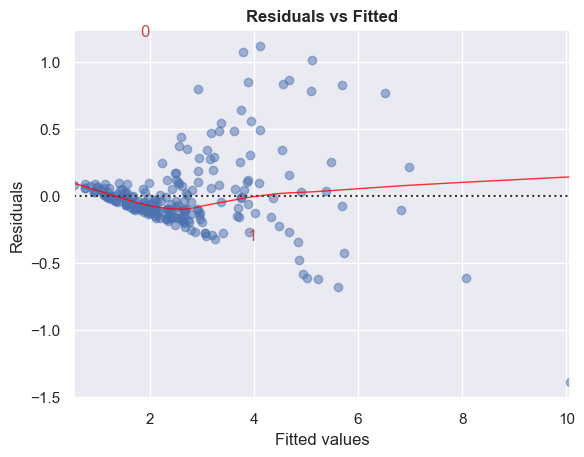

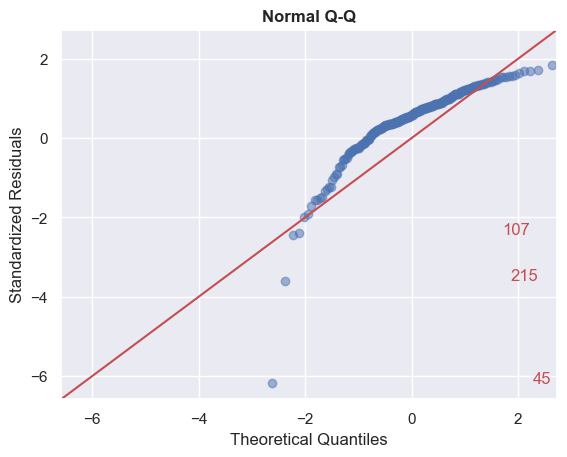

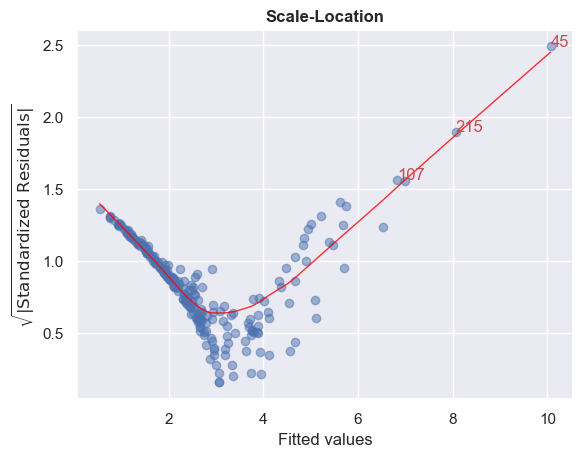

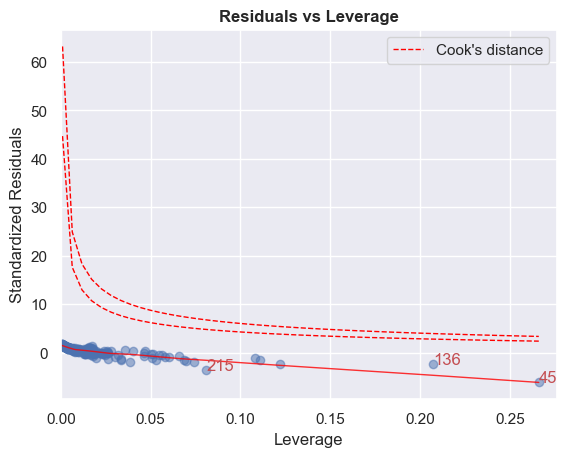

In [73]:
#%run ./Linear_Reg_Diagnostic.py
SM_fit_diagnose = Linear_Reg_Diagnostic(SM_fit)
SM_fit_diagnose
#plotea el grafico residuals vs fitted
SM_fit_diagnose.residual_plot()
plt.show()
#plotea el qq-plot de los residuos
SM_fit_diagnose.qq_plot()
plt.show()
#Este grafico estandariza los residuos y los plotea frente fitted
SM_fit_diagnose.scale_location_plot()
plt.show()
#si un punto tiene un gran leverega es que tiene gran influencia en el modelo
SM_fit_diagnose.leverage_plot()
plt.show()

+ As you can see in the first graph, the residuals are very high, possibly produced by outliers.
+ In the second graph you can see that they do not follow a normal distribution
+ In the last graph you can see that it is below the Cook curve which is what you would expect

## LOGISTIC REGRESSION

+ Predicting whether a book is fiction or non fiction.

First of all we are going to see which of the Overall Rating variables has the most relationship with the genre.

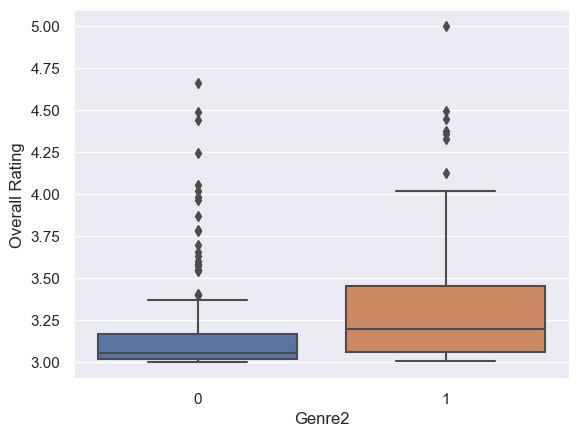

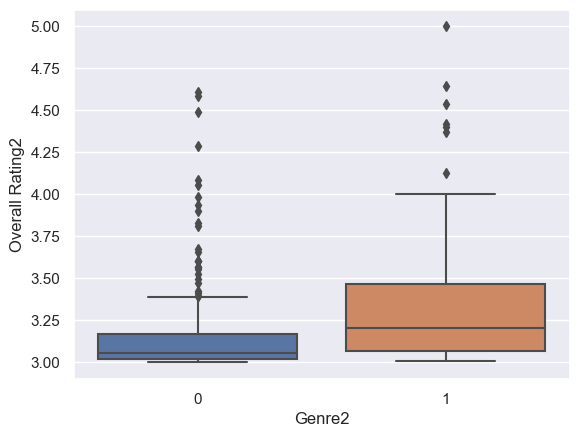

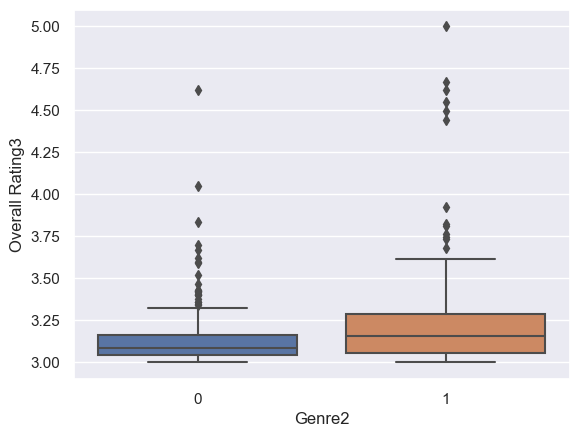

In [47]:
for i in ['Overall Rating','Overall Rating2','Overall Rating3']:
    sns.boxplot(data = df2,x='Genre2',y=i)
    plt.show()

 Overall Rating and Overall Rating2 explain the Genre better than Overall Rating3. Since they have such similar boxplots, we will randomly choose Overall rating2 to make the predictions.

In [55]:
selected_columns_2=[ "Reviews","Count",'Price',"Overall Rating2"]
X_train_LR,X_test_LR,y_train_LR,y_test_LR=train_test_split(df2[selected_columns],df2["Genre2"],test_size=0.2,random_state=42)
y_test_LR.head()

Author
Glenn Beck             0
The Washington Post    0
Amelia Hepworth        1
Sheryl Sandberg        0
Andy Weir              1
Name: Genre2, dtype: int64

In [56]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train_LR,y_train_LR)

LogisticRegression()

In [57]:
lgr_pred=lgr.predict(X_test_LR)

In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_LR,lrg_pred)
cm

ValueError: Classification metrics can't handle a mix of binary and continuous targets

From the confusion matrix we can tell that the model tends to predict non fiction (0).

In [53]:
#accuracy
acc = (cm[0,0]+cm[1,1])/(cm.sum().sum())
print("The model has a test accuracy of:",acc)

NameError: name 'cm' is not defined

## Confidence Interval

We have performed an hypothesis test for the average price with a confidence level of 95%

In [ ]:
Df_Price = books['Price']
cl = 0.95
alpha = 1 - cl
n = len(Df_Price)

CI_Price=stats.t.interval(alpha, df=len(Df_Price), loc=np.mean(Df_Price), scale=stats.sem(Df_Price))
print('The confidence interval (95%) for the price is: ', CI_Price)
print("Rounded to 4 digits: [{:.4}, {:.4}]".format(CI_Price[0], CI_Price[1]))

The confidence interval (95%) for the price is:  (12.739130096466404, 12.789208365072056)
Rounded to 4 digits: [12.74, 12.79]


## Hypothesis Test

We want to check if an average price of 15$ would be a surprise, for a significance level of 95%.

Therefore, the null hypothesis is:

$$
\quad\\
H_0:\{\mu = \mu_0\}\\
$$

And the alternative hypothesis is:
 $$
\quad\\
H_a:\{\mu \neq \mu_0\},\quad\text{ with }\quad\mu_0 = \text{mean price}\\
$$

In [ ]:
n = len(Df_Price)
print('n =', n)

mu0 = Df_Price.mean()
print('mu0 =', mu0)

barX = 15
print('barX =', barX)
s = Df_Price.std()

Zscore = np.abs((barX - mu0)/(s/np.sqrt(n)))
print("\nThe absolute value of the Z score is {:.4}".format(Zscore))

sl = 0.95
alpha = 1 - sl
criticalValue = stats.norm.isf(alpha/2)
print("The right side critical value is: {:.4}".format(criticalValue))

pValue = 2 * stats.norm.sf(Zscore)
print("And the resulting p-value is: {:.4}".format(pValue))

n = 650
mu0 = 12.76416923076923
barX = 15

The absolute value of the Z score is 5.601
The right side critical value is: 1.96
And the resulting p-value is: 2.125e-08


As we can see, the p-value is very close to 0 and very far away from alpha (0.05), so we reject the null hypothesis which means that finding a book from the best seller list with and average price of 15$ would be a surprise.